**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( B )

---


Engenheiro(a) do conhecimento:
* Arthur Cavalcante de Andrade

---

# Solução para o Problema

### Preparando os Dados

Inicialmente importamos as bibliotecas necessárias.

In [1]:
from sklearn import svm, datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy

Importamos os dados e verificamos as quantidades colunas existentes.

In [2]:
df = pandas.read_csv('breast-cancer-wisconsin-imputed.csv')
df.shape

(699, 10)

Dividimos as variáveis independentes e dependentes em `X` e `y`, respectivamente.

In [3]:
X = df.iloc[:, 0:9].values
y = df.iloc[:, 9].values

### Criando os Modelos

Para a criação e verificação dos resultados das SVMs, iremos utilizar os seguintes modelos da biblioteca **SciKit Learn**:

* **SVC** com kernels linear, RBF e polinomial;
* **LinearSVC**.

Para definir a relevância da quantidade de características iremos utilizar o **SMV-Anova**, que mostra como implementar uma seleção de univariada (uma variável por vez) de característica antes de usar um classificador **SVC**, para melhorar o desempenho de classificação.

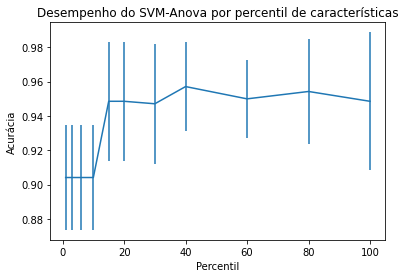

In [4]:
# Criando uma transformação de seleção de recursos e uma instância de SVM que
# combinamos para ter um estimador completo

transform = SelectPercentile(chi2)

clf = Pipeline([('anova', transform), ('svc', SVC(gamma="auto"))])

# Plotaqndo a pontuação de validação cruzada em função do percentil de recursos
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y, cv=5, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, numpy.array(score_stds))

plt.title('Desempenho do SVM-Anova por percentil de características')
plt.xlabel('Percentil')
plt.ylabel('Acurácia')

plt.axis('tight')
plt.show()

Podemos verificar que nosso modelo obtém uma performance consistente no topo quando selecionamos por volta de 40% das características.

No entanto, a maior performance é atingida quando 100% das características são utilizadas.

Por isso, iremos utilizar todas as características e avaliar o desempenho dentro dos modelos citados.

##### Modelo SVC com kernel linear

In [5]:
# Iremos armazenar as soluções em um dicionário
# Agrupados por tamanho da base de teste
solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        # Dividimos o atributo alvo dos demais atributos
        y = df['Class']
        X = df.drop('Class', axis=1)

        # Separamos os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        # Criamos o modelo, treinamos a rede e testamos
        svc = svm.SVC(kernel='linear')
        y_pred = svc.fit(X_train, y_train).predict(X_test)

        # Salvamos no dicionário o valor de estado randômico 
        # e acurácia obtida pela solução
        accuracy = classification_report(y_test,y_pred,output_dict=True,zero_division=0)['accuracy']
        solutions[t_size].append([r_state, accuracy])

max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    # Ordenamos as soluções pela acurácia
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)

    # Adicionamos a maior e a menor acurácia para o atual tamanho de base de teste
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][999][1], decimals=2))

accuracy_svc = (sum(max_series)+sum(min_series))/14

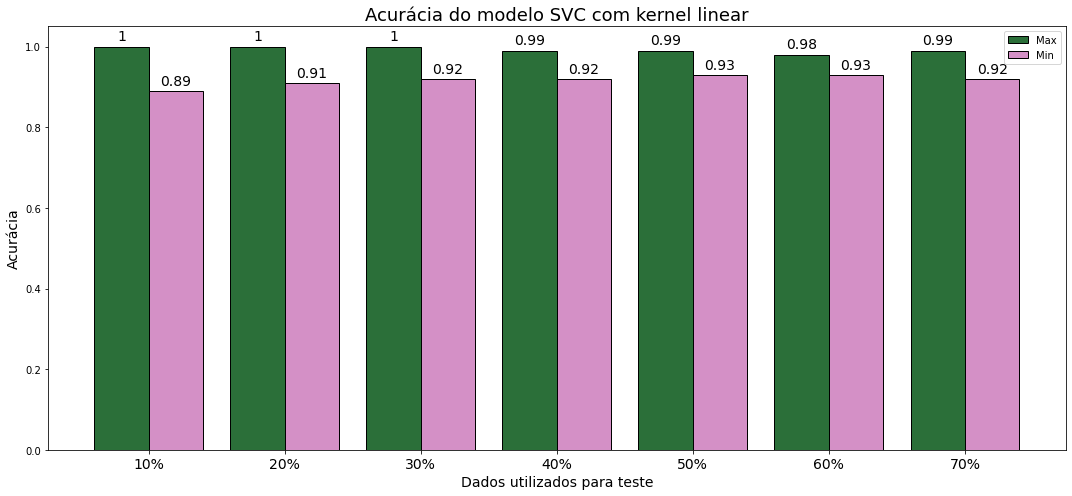

In [6]:
labels = ["10%", "20%", "30%", "40%", "50%", "60%", "70%"]
x = numpy.arange(len(labels))  # Ordem das labels
width = 0.40  # largura das barras
colors = seaborn.color_palette('cubehelix', n_colors=2)

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Adiciona texto às labels, titulo, tick labels personalizadas, etc.
ax.set_ylabel('Acurácia', fontsize=14)
ax.set_xlabel('Dados utilizados para teste', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=10)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Acurácia do modelo SVC com kernel linear', fontsize=18)

fig.tight_layout()

plt.show()

##### Modelo SVC com kernel RBF

In [7]:
# Iremos armazenar as soluções em um dicionário
# Agrupados por tamanho da base de teste
solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        # Dividimos o atributo alvo dos demais atributos
        y = df['Class']
        X = df.drop('Class', axis=1)

        # Separamos os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        # Criamos o modelo, treinamos a rede e testamos
        svc = svm.SVC(kernel='rbf')
        y_pred = svc.fit(X_train, y_train).predict(X_test)

        # Salvamos no dicionário o valor de estado randômico 
        # e acurácia obtida pela solução
        accuracy = classification_report(y_test,y_pred,output_dict=True,zero_division=0)['accuracy']
        solutions[t_size].append([r_state, accuracy])

max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    # Ordenamos as soluções pela acurácia
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)

    # Adicionamos a maior e a menor acurácia para o atual tamanho de base de teste
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][999][1], decimals=2))

accuracy_rbf_svc = (sum(max_series)+sum(min_series))/14

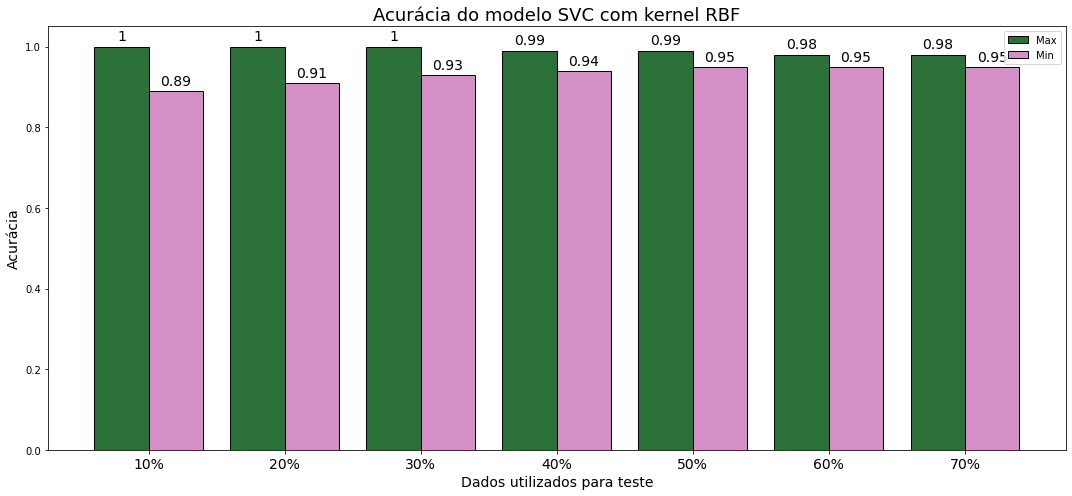

In [8]:
labels = ["10%", "20%", "30%", "40%", "50%", "60%", "70%"]
x = numpy.arange(len(labels))  # Ordem das labels
width = 0.40  # largura das barras
colors = seaborn.color_palette('cubehelix', n_colors=2)

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Adiciona texto às labels, titulo, tick labels personalizadas, etc.
ax.set_ylabel('Acurácia', fontsize=14)
ax.set_xlabel('Dados utilizados para teste', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=10)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Acurácia do modelo SVC com kernel RBF', fontsize=18)

fig.tight_layout()

plt.show()

##### Modelo SVC com kernel polinomial (grau 3)

In [9]:
# Iremos armazenar as soluções em um dicionário
# Agrupados por tamanho da base de teste
solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        # Dividimos o atributo alvo dos demais atributos
        y = df['Class']
        X = df.drop('Class', axis=1)

        # Separamos os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        # Criamos o modelo, treinamos a rede e testamos
        svc = svm.SVC(kernel='poly')
        y_pred = svc.fit(X_train, y_train).predict(X_test)

        # Salvamos no dicionário o valor de estado randômico 
        # e acurácia obtida pela solução
        accuracy = classification_report(y_test,y_pred,output_dict=True,zero_division=0)['accuracy']
        solutions[t_size].append([r_state, accuracy])

max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    # Ordenamos as soluções pela acurácia
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)

    # Adicionamos a maior e a menor acurácia para o atual tamanho de base de teste
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][999][1], decimals=2))

accuracy_poly_svc = (sum(max_series)+sum(min_series))/14

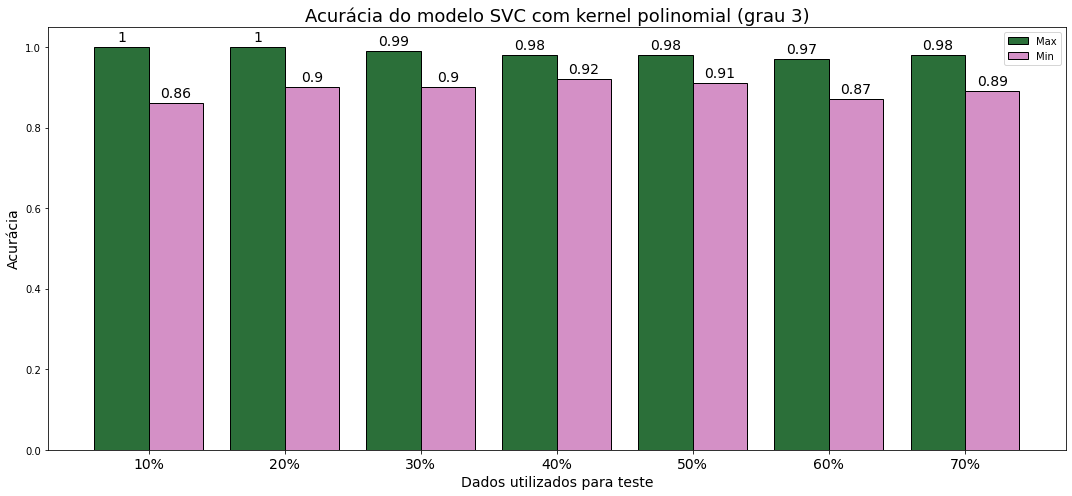

In [10]:
labels = ["10%", "20%", "30%", "40%", "50%", "60%", "70%"]
x = numpy.arange(len(labels))  # Ordem das labels
width = 0.40  # largura das barras
colors = seaborn.color_palette('cubehelix', n_colors=2)

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Adiciona texto às labels, titulo, tick labels personalizadas, etc.
ax.set_ylabel('Acurácia', fontsize=14)
ax.set_xlabel('Dados utilizados para teste', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=10)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Acurácia do modelo SVC com kernel polinomial (grau 3)', fontsize=18)

fig.tight_layout()

plt.show()

##### Modelo LinearSVC

In [ ]:
# Iremos armazenar as soluções em um dicionário
# Agrupados por tamanho da base de teste
solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        # Dividimos o atributo alvo dos demais atributos
        y = df['Class']
        X = df.drop('Class', axis=1)

        # Separamos os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        # Criamos o modelo, treinamos a rede e testamos
        svc = svm.LinearSVC()
        y_pred = svc.fit(X_train, y_train).predict(X_test)

        # Salvamos no dicionário o valor de estado randômico 
        # e acurácia obtida pela solução
        accuracy = classification_report(y_test,y_pred,output_dict=True,zero_division=0)['accuracy']
        solutions[t_size].append([r_state, accuracy])

max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    # Ordenamos as soluções pela acurácia
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)

    # Adicionamos a maior e a menor acurácia para o atual tamanho de base de teste
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][999][1], decimals=2))

accuracy_lin_svc = (sum(max_series)+sum(min_series))/14

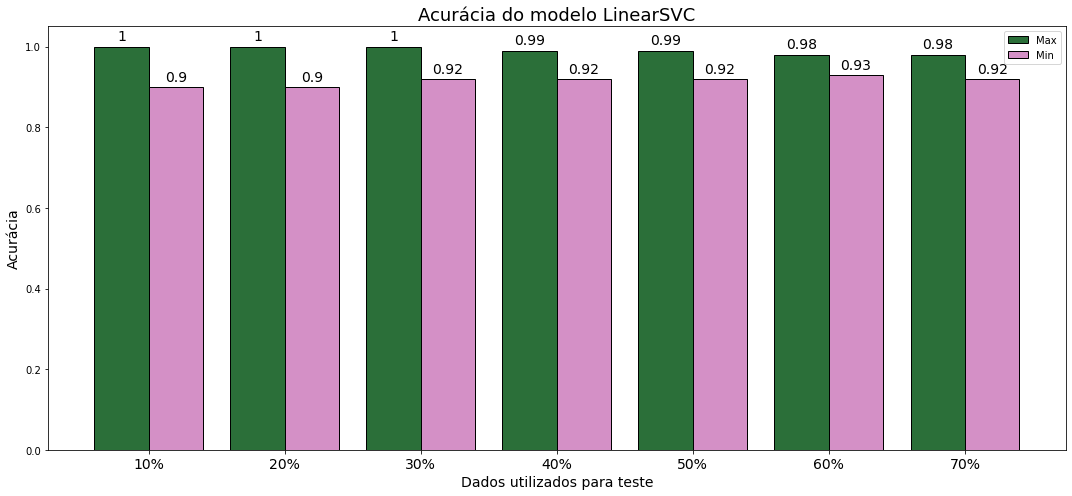

In [12]:
labels = ["10%", "20%", "30%", "40%", "50%", "60%", "70%"]
x = numpy.arange(len(labels))  # Ordem das labels
width = 0.40  # largura das barras
colors = seaborn.color_palette('cubehelix', n_colors=2)

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Adiciona texto às labels, titulo, tick labels personalizadas, etc.
ax.set_ylabel('Acurácia', fontsize=14)
ax.set_xlabel('Dados utilizados para teste', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=10)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Acurácia do modelo LinearSVC', fontsize=18)

fig.tight_layout()

plt.show()

### Conclusão

No tópicos acima podemos observar os valores máximos e mínimos de acurácia para conjuntos de dados de teste e treino de diferentes proporções.

A partir da união destes resultados, podemos estimar a média de acurácia para os modelos criados, como apresentado no gráfico abaixo.

<function matplotlib.pyplot.show(close=None, block=None)>

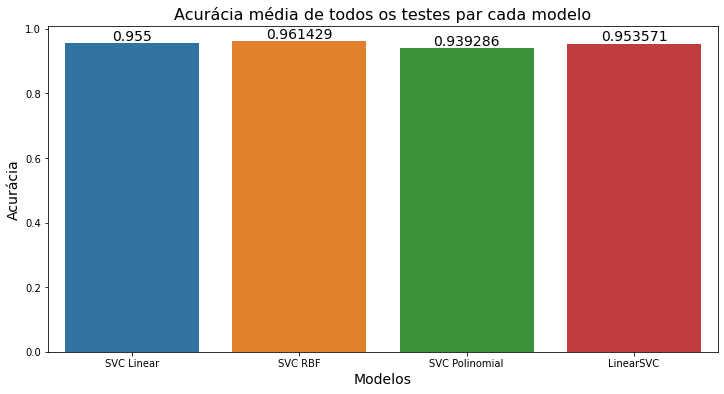

In [47]:
accuracy = [accuracy_svc, accuracy_rbf_svc, accuracy_poly_svc, accuracy_lin_svc]
labels = ['SVC Linear', 'SVC RBF', 'SVC Polinomial', 'LinearSVC']

fig, ax = plt.subplots(figsize=(12,6))
# Plotando os resultados
#ax = seaborn.barplot(x=['SVC Linear', 'SVC RBF', 'SVC Polinomial', 'LinearSVC'], y=accuracy)
ax = seaborn.barplot(x=labels, y=accuracy)
ax.set_title('Acurácia média de todos os testes para cada modelo', fontsize=16)
ax.set_ylabel('Acurácia', fontsize=14)
ax.set_xlabel('Modelos', fontsize=14)
ax.bar_label(ax.containers[0], padding=0, fontsize=14)
plt.show

A partir da visualização de todos estes resultados podemos destacar:

* Dos modelos treinados o SVC com kernel polinomial obteve o menor desempenho, ficando em média abaixo de 95% de acurácia. Contudo, apesar de obter a menor acurácia média, garantiu resultados otimistas para o modelo.

* Os demais modelos possuem uma acurácia mais satisfatória, com média acima de 95%, gerando uma classificação de maior confiabilidade.

* Apesar o modelo SVC com kernel RBF garantir uma maior média, o modelo LinearSVC foi o mais consistente nos resultados. Isso é observado a sua menor acurácia encontrada foi maior em relação a dos outros modelos, sendo de esta de 90%.

Dessa forma, por garantir a segunda maior média e obter resultados de classificações mais consistentes, para este conjunto de dados, o modelo LinearSVC é o ideal a ser adotado.